In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
pd.set_option('display.max_columns', None)
import datetime as dt
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [8]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [11]:
def get_df_info(df, include_unique=True):
    column = [col for col in df.columns]
    column_type = [type(cell) for cell in df.loc[0,:]]
    null_count = [df[col].isna().sum() for col in df.columns]
    null_percent = [((df[col].isna().sum()/df.shape[0])*100) for col in df.columns]
    unique_values_percentage = [(100*len(df[col].unique()))/df.shape[0] for col in df.columns]
    if include_unique:
        unique = [df[col].unique() for col in df.columns]
        unique_count = [df[col].nunique() for col in df.columns]
        df_info = pd.DataFrame({'column': column, 'column_type': column_type,
                                'null_count': null_count, 'unique_count': unique_count,
                                'unique_values_percentage' : unique_values_percentage,
                                'null_percent': null_percent, 'unique_values': unique})
    else:
        df_info = pd.DataFrame({'column': column, 'column_type': column_type,
                                'null_count': null_count, 'null_percent': null_percent})
        
    return df_info
    

get_df_info(df)

,column,column_type,null_count,unique_count,unique_values_percentage,null_percent,unique_values
0,hotel,<class 'str'>,0,2,0.001675,0.000000,"[Resort Hotel, City Hotel]"
1,is_canceled,<class 'numpy.int64'>,0,2,0.001675,0.000000,"[0, 1]"
2,lead_time,<class 'numpy.int64'>,0,479,0.401206,0.000000,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,<class 'numpy.int64'>,0,3,0.002513,0.000000,"[2015, 2016, 2017]"
4,arrival_date_month,<class 'str'>,0,12,0.010051,0.000000,"[July, August, September, October, November, D..."
5,arrival_date_week_number,<class 'numpy.int64'>,0,53,0.044392,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,<class 'numpy.int64'>,0,31,0.025965,0.000000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,<class 'numpy.int64'>,0,17,0.014239,0.000000,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,<class 'numpy.int64'>,0,35,0.029316,0.000000,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,<class 'numpy.int64'>,0,14,0.011726,0.000000,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


In [12]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
df['children'] = df['children'].fillna(0)

In [14]:
mode_country = df['country'].mode()
mode_country

0    PRT
dtype: object

In [15]:
df['country'].fillna(value = 'PRT',inplace = True)

In [16]:
df.drop(columns = ['agent', 'company'], axis = 1, inplace = True)

In [17]:
print("unique values for adults is ", df['adults'].unique())
print("unique values for children is ",df['children'].unique())
print("unique values for babies is ",df['babies'].unique())

unique values for adults is  [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
unique values for children is  [ 0.  1.  2. 10.  3.]
unique values for babies is  [ 0  1  2 10  9]


In [18]:
filter1 = (df['adults']==0)

In [19]:
df = df[~filter1]

In [20]:
filter2 = (df['adr'] <0)

In [21]:
df = df[~filter2]

In [22]:
filter3 = (df['adr'] > 1000)

In [23]:
df = df[~filter3]

In [24]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,2015-07-01


In [25]:
df['arrival_day'] = df['arrival_date'].dt.day_name()

In [26]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis = 1, inplace = True)

In [27]:
filter4 = (df['total_stays'] == 0)

In [28]:
df = df[~filter4]

In [29]:
df['kids'] = df['children'] + df['babies']
df.drop(['children','babies'], axis = 1, inplace = True)

In [30]:
df['meal'].value_counts()

BB           91503
HB           14380
SC           10500
Undefined     1160
FB             797
Name: meal, dtype: int64

In [31]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')

In [32]:
df['hotel'].groupby(df['is_canceled']).value_counts()

is_canceled  hotel       
0            City Hotel      45694
             Resort Hotel    28555
1            City Hotel      32981
             Resort Hotel    11110
Name: hotel, dtype: int64

In [33]:
df['lead_time_months'] = df['lead_time'] // 30

In [34]:
df['lead_time_months'].value_counts()

0     37398
1     17080
2     12663
3     10435
4      8035
5      7881
6      5690
7      4347
9      3435
8      3417
10     2736
11     1785
12      975
13      816
15      566
14      531
20      145
16      123
17      122
18       91
19       68
23        1
Name: lead_time_months, dtype: int64

In [35]:
df['distribution_channel'].value_counts()

TA/TO        97144
Direct       14417
Corporate     6584
GDS            190
Undefined        5
Name: distribution_channel, dtype: int64

In [36]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

In [37]:
df['market_segment'].value_counts()

Online TA        55942
Offline TA/TO    24045
Groups           19758
Direct           12420
Corporate         5231
Complementary      711
Aviation           231
Undefined            2
Name: market_segment, dtype: int64

In [38]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

In [39]:
df['country'].value_counts()

PRT    48372
GBR    12079
FRA    10364
ESP     8530
DEU     7271
       ...  
VGB        1
MMR        1
DMA        1
HND        1
CYM        1
Name: country, Length: 177, dtype: int64

In [40]:
df['booking_location'] = ''
for i in range(0,df.shape[0]):
    if df['country'].values[i] == 'PRT':
        df['booking_location'].values[i] = 'local'
    else:
        df['booking_location'].values[i] = 'international'    
df.drop('country', axis = 1,inplace = True)

In [41]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day,total_stays,kids,lead_time_months,booking_location
2,Resort Hotel,0,7,2015,July,27,1,1,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,2015-07-01,Wednesday,1,0.0,0,international
3,Resort Hotel,0,13,2015,July,27,1,1,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,2015-07-01,Wednesday,1,0.0,0,international
4,Resort Hotel,0,14,2015,July,27,1,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,2015-07-01,Wednesday,2,0.0,0,international
5,Resort Hotel,0,14,2015,July,27,1,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,2015-07-01,Wednesday,2,0.0,0,international
6,Resort Hotel,0,0,2015,July,27,1,2,BB,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,7/3/2015,2015-07-01,Wednesday,2,0.0,0,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,2017-08-30,Wednesday,7,0.0,0,international
119386,City Hotel,0,102,2017,August,35,31,3,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,2017-08-31,Thursday,7,0.0,3,international
119387,City Hotel,0,34,2017,August,35,31,2,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,2017-08-31,Thursday,7,0.0,1,international
119388,City Hotel,0,109,2017,August,35,31,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,2017-08-31,Thursday,7,0.0,3,international


In [42]:
df['reserved_room_type'].value_counts()

A    85386
D    19095
E     6481
F     2877
G     2073
C      923
B      902
H      597
L        6
Name: reserved_room_type, dtype: int64

In [43]:
df['deposit_type'].value_counts()

No Deposit    103592
Non Refund     14586
Refundable       162
Name: deposit_type, dtype: int64

In [44]:
df['is_repeated_guest'].value_counts()

0    114843
1      3497
Name: is_repeated_guest, dtype: int64

In [45]:
df['previous_cancellations'].value_counts()

0     111867
1       6042
2        114
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [46]:
for i in range(0,df.shape[0]):
    if df['previous_cancellations'].values[i] == 0:
        df['previous_cancellations'].values[i] = 0
    else:
        df['previous_cancellations'].values[i] = 1   

In [47]:
df['booking_changes'].value_counts()

0     100548
1      12528
2       3751
3        906
4        364
5        110
6         60
7         27
8         14
9          8
10         6
13         5
14         3
15         3
17         2
16         2
11         1
12         1
18         1
Name: booking_changes, dtype: int64

In [48]:
for i in range(0,df.shape[0]):
    if df['booking_changes'].values[i] == 0:
        df['booking_changes'].values[i] = 0
    else:
        df['booking_changes'].values[i] = 1   

In [49]:
df['total_of_special_requests'].value_counts()

0    69730
1    32907
2    12853
3     2472
4      338
5       40
Name: total_of_special_requests, dtype: int64

In [50]:
df['arrival_date_month'].value_counts()

August       13780
July         12553
May          11688
October      11048
April        11024
June         10879
September    10466
March         9697
February      7980
November      6706
December      6666
January       5853
Name: arrival_date_month, dtype: int64

In [51]:
df['arrival_day'].value_counts()

Friday       19464
Thursday     19095
Monday       18021
Saturday     17932
Wednesday    15974
Sunday       14041
Tuesday      13813
Name: arrival_day, dtype: int64

In [52]:
df['change_in_room'] = ''
for i in range(0,df.shape[0]):
    if df['reserved_room_type'].values[i] == df['assigned_room_type'].values[i]:
        df['change_in_room'].values[i] = 0
    else:
        df['change_in_room'].values[i] = 1  
df.drop(['reserved_room_type','assigned_room_type'], axis = 1, inplace = True)

In [53]:
df['arrival_date'] = ''
for i in range(0,df.shape[0]):
    if df['arrival_date_day_of_month'].values[i] in range(1,11):
        df['arrival_date'].values[i] = 'start'
    elif df['arrival_date_day_of_month'].values[i] in range(11,21):
        df['arrival_date'].values[i] = 'mid'
    else:
        df['arrival_date'].values[i] = 'end'
df.drop('arrival_date_day_of_month', axis = 1, inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118340 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118340 non-null  object 
 1   is_canceled                     118340 non-null  int64  
 2   lead_time                       118340 non-null  int64  
 3   arrival_date_year               118340 non-null  int64  
 4   arrival_date_month              118340 non-null  object 
 5   arrival_date_week_number        118340 non-null  int64  
 6   adults                          118340 non-null  int64  
 7   meal                            118340 non-null  object 
 8   market_segment                  118340 non-null  object 
 9   distribution_channel            118340 non-null  object 
 10  is_repeated_guest               118340 non-null  int64  
 11  previous_cancellations          118340 non-null  int64  
 12  previous_booking

In [55]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day,total_stays,kids,lead_time_months,booking_location,change_in_room
2,Resort Hotel,0,7,2015,July,27,1,BB,Direct,Direct,0,0,0,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,start,Wednesday,1,0.0,0,international,1
3,Resort Hotel,0,13,2015,July,27,1,BB,Corporate,Corporate,0,0,0,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,start,Wednesday,1,0.0,0,international,0
4,Resort Hotel,0,14,2015,July,27,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,start,Wednesday,2,0.0,0,international,0
5,Resort Hotel,0,14,2015,July,27,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,start,Wednesday,2,0.0,0,international,0
6,Resort Hotel,0,0,2015,July,27,2,BB,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,Check-Out,7/3/2015,start,Wednesday,2,0.0,0,local,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,2,BB,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,end,Wednesday,7,0.0,0,international,0
119386,City Hotel,0,102,2017,August,35,3,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,end,Thursday,7,0.0,3,international,0
119387,City Hotel,0,34,2017,August,35,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,end,Thursday,7,0.0,1,international,0
119388,City Hotel,0,109,2017,August,35,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,end,Thursday,7,0.0,3,international,0


In [56]:
df.drop(['arrival_date_year','arrival_date_week_number','reservation_status','reservation_status_date','lead_time'], axis = 1, inplace =True)

In [57]:
df

,hotel,is_canceled,arrival_date_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_day,total_stays,kids,lead_time_months,booking_location,change_in_room
2,Resort Hotel,0,July,1,BB,Direct,Direct,0,0,0,0,No Deposit,0,Transient,75.00,0,0,start,Wednesday,1,0.0,0,international,1
3,Resort Hotel,0,July,1,BB,Corporate,Corporate,0,0,0,0,No Deposit,0,Transient,75.00,0,0,start,Wednesday,1,0.0,0,international,0
4,Resort Hotel,0,July,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,98.00,0,1,start,Wednesday,2,0.0,0,international,0
5,Resort Hotel,0,July,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,98.00,0,1,start,Wednesday,2,0.0,0,international,0
6,Resort Hotel,0,July,2,BB,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.00,0,0,start,Wednesday,2,0.0,0,local,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,2,BB,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Transient,96.14,0,0,end,Wednesday,7,0.0,0,international,0
119386,City Hotel,0,August,3,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,225.43,0,2,end,Thursday,7,0.0,3,international,0
119387,City Hotel,0,August,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,157.71,0,4,end,Thursday,7,0.0,1,international,0
119388,City Hotel,0,August,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,104.40,0,0,end,Thursday,7,0.0,3,international,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118340 entries, 2 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118340 non-null  object 
 1   is_canceled                     118340 non-null  int64  
 2   arrival_date_month              118340 non-null  object 
 3   adults                          118340 non-null  int64  
 4   meal                            118340 non-null  object 
 5   market_segment                  118340 non-null  object 
 6   distribution_channel            118340 non-null  object 
 7   is_repeated_guest               118340 non-null  int64  
 8   previous_cancellations          118340 non-null  int64  
 9   previous_bookings_not_canceled  118340 non-null  int64  
 10  booking_changes                 118340 non-null  int64  
 11  deposit_type                    118340 non-null  object 
 12  days_in_waiting_

In [59]:
num_features = []
for col in df.columns:
    if df[col].dtype!='object':
        num_features.append(col)
cat_features = []
for col in df.columns:
    if df[col].dtype=='object':
        cat_features.append(col)

In [60]:
data_cat = df[cat_features]
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,arrival_date,arrival_day,booking_location,change_in_room
2,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,start,Wednesday,international,1
3,Resort Hotel,July,BB,Corporate,Corporate,No Deposit,Transient,start,Wednesday,international,0
4,Resort Hotel,July,BB,Online TA,TA/TO,No Deposit,Transient,start,Wednesday,international,0
5,Resort Hotel,July,BB,Online TA,TA/TO,No Deposit,Transient,start,Wednesday,international,0
6,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,start,Wednesday,local,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,No Deposit,Transient,end,Wednesday,international,0
119386,City Hotel,August,BB,Online TA,TA/TO,No Deposit,Transient,end,Thursday,international,0
119387,City Hotel,August,BB,Online TA,TA/TO,No Deposit,Transient,end,Thursday,international,0
119388,City Hotel,August,BB,Online TA,TA/TO,No Deposit,Transient,end,Thursday,international,0


In [61]:
data_cat['cancellation'] = df['is_canceled']
cols = data_cat.columns[0:10]

In [62]:
for col in cols:
    dict = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict)

In [63]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,arrival_date,arrival_day,booking_location,change_in_room,cancellation
2,0.280096,0.376484,0.375955,0.154831,0.176320,0.28537,0.410068,0.376710,0.363340,0.236580,1,0
3,0.280096,0.376484,0.375955,0.189065,0.222053,0.28537,0.410068,0.376710,0.363340,0.236580,0,0
4,0.280096,0.376484,0.375955,0.369119,0.412253,0.28537,0.410068,0.376710,0.363340,0.236580,0,0
5,0.280096,0.376484,0.375955,0.369119,0.412253,0.28537,0.410068,0.376710,0.363340,0.236580,0,0
6,0.280096,0.376484,0.375955,0.154831,0.176320,0.28537,0.410068,0.376710,0.363340,0.569296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419206,0.379245,0.375955,0.345145,0.412253,0.28537,0.410068,0.367098,0.363340,0.236580,0,0
119386,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0
119387,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0
119388,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0


In [64]:
data_cat['change_in_room'] = pd.to_numeric(data_cat['change_in_room'])

In [65]:
dataframe =  pd.concat([data_cat,df[num_features]], axis = 1)

In [66]:
dataframe

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,arrival_date,arrival_day,booking_location,change_in_room,cancellation,is_canceled,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,kids,lead_time_months
2,0.280096,0.376484,0.375955,0.154831,0.176320,0.28537,0.410068,0.376710,0.363340,0.236580,1,0,0,1,0,0,0,0,0,75.00,0,0,1,0.0,0
3,0.280096,0.376484,0.375955,0.189065,0.222053,0.28537,0.410068,0.376710,0.363340,0.236580,0,0,0,1,0,0,0,0,0,75.00,0,0,1,0.0,0
4,0.280096,0.376484,0.375955,0.369119,0.412253,0.28537,0.410068,0.376710,0.363340,0.236580,0,0,0,2,0,0,0,0,0,98.00,0,1,2,0.0,0
5,0.280096,0.376484,0.375955,0.369119,0.412253,0.28537,0.410068,0.376710,0.363340,0.236580,0,0,0,2,0,0,0,0,0,98.00,0,1,2,0.0,0
6,0.280096,0.376484,0.375955,0.154831,0.176320,0.28537,0.410068,0.376710,0.363340,0.569296,0,0,0,2,0,0,0,0,0,107.00,0,0,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.419206,0.379245,0.375955,0.345145,0.412253,0.28537,0.410068,0.367098,0.363340,0.236580,0,0,0,2,0,0,0,0,0,96.14,0,0,7,0.0,0
119386,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0,0,3,0,0,0,0,0,225.43,0,2,7,0.0,3
119387,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0,0,2,0,0,0,0,0,157.71,0,4,7,0.0,1
119388,0.419206,0.379245,0.375955,0.369119,0.412253,0.28537,0.410068,0.367098,0.414611,0.236580,0,0,0,2,0,0,0,0,0,104.40,0,0,7,0.0,3


In [67]:
from scipy.special import boxcox
lam = 0.15
dataframe['adr'] = boxcox(dataframe['adr'], lam)

In [68]:
dataframe.drop('cancellation', axis = 1,  inplace = True)

In [69]:
y1 = dataframe['is_canceled']
x1 = dataframe.drop(['is_canceled'], axis = 1)

Text(0.5, 1.0, 'variance for test data')

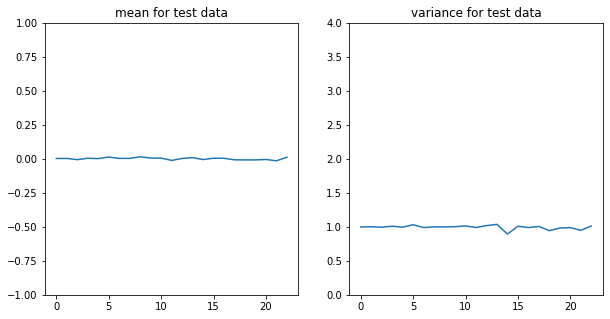

In [70]:
#standardising the train and test data and check for mean and variance graphs 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 43, stratify=y1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
means = []
var = []
for i in range(0, x_test.shape[1]):
    mean = np.mean(x_test[:,i])
    means.append(mean)
    variances = np.var(x_test[:,i])
    var.append(variances)
figure, axis = plt.subplots(1,2, gridspec_kw={'width_ratios': [1,1]}, figsize=(10,5))
axis[0].set_ylim([-1, 1])
axis[0].plot(means)
axis[0].set_title("mean for test data")
axis[1].plot(var)
axis[1].set_ylim([0, 4])
axis[1].set_title("variance for test data")

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
models = []
models.append(('Model name : LogisticRegression',LogisticRegression()))
models.append(('Model name : KNN', KNeighborsClassifier()))
models.append(('Model name : random forest', RandomForestClassifier()))
models.append(('Model name : decision tree', DecisionTreeClassifier()))

Model name : LogisticRegression


[[20505  1770]
 [ 5261  7966]]




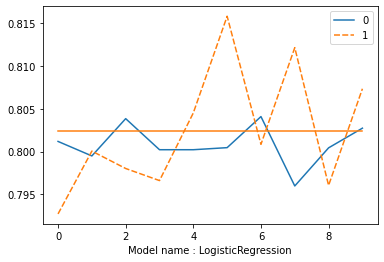

classification report               precision    recall  f1-score   support

           0       0.80      0.92      0.85     22275
           1       0.82      0.60      0.69     13227

    accuracy                           0.80     35502
   macro avg       0.81      0.76      0.77     35502
weighted avg       0.80      0.80      0.79     35502



Model name : KNN


[[19766  2509]
 [ 3341  9886]]




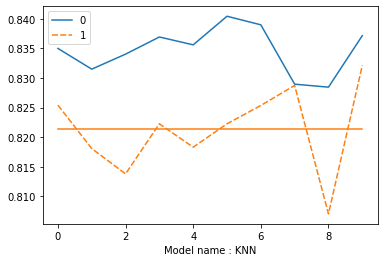

classification report               precision    recall  f1-score   support

           0       0.86      0.89      0.87     22275
           1       0.80      0.75      0.77     13227

    accuracy                           0.84     35502
   macro avg       0.83      0.82      0.82     35502
weighted avg       0.83      0.84      0.83     35502



Model name : random forest


[[20519  1756]
 [ 2723 10504]]




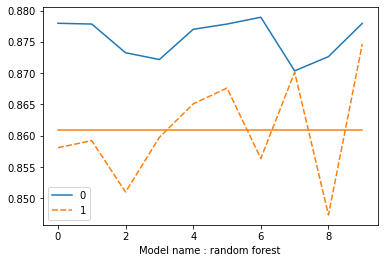

classification report               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22275
           1       0.86      0.79      0.82     13227

    accuracy                           0.87     35502
   macro avg       0.87      0.86      0.86     35502
weighted avg       0.87      0.87      0.87     35502



Model name : decision tree


[[19289  2986]
 [ 2739 10488]]




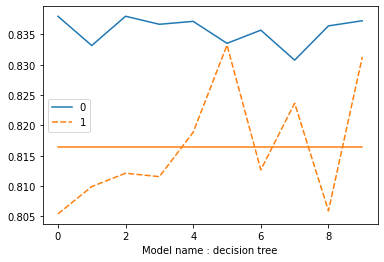

classification report               precision    recall  f1-score   support

           0       0.88      0.87      0.87     22275
           1       0.78      0.79      0.79     13227

    accuracy                           0.84     35502
   macro avg       0.83      0.83      0.83     35502
weighted avg       0.84      0.84      0.84     35502





In [73]:
for name,model in models:
    print(name)
    print('\n')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(confusion_matrix(y_test, predictions))
    print('\n')
    from sklearn.model_selection import KFold 
    kf = KFold(n_splits=10) 
    test_scores_k_fold = []
    train_scores_k_fold = []
    from sklearn.model_selection import cross_val_score 
    train_scores_k_fold = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    test_scores_k_fold = cross_val_score(estimator = model, X = x_test, y = y_test, cv = 10) 
    sns.lineplot(data = [train_scores_k_fold,test_scores_k_fold])
    plt.plot([np.mean(test_scores_k_fold)]*len(test_scores_k_fold))
    plt.xlabel(name)
    plt.show()
    from sklearn.metrics import classification_report
    print('classification report {}'.format(classification_report(y_test,predictions)))
    print('\n')

# using PCA

Model name : LogisticRegression


[[20439  1836]
 [ 5214  8013]]




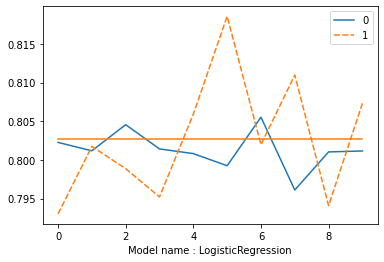

classification report               precision    recall  f1-score   support

           0       0.80      0.92      0.85     22275
           1       0.81      0.61      0.69     13227

    accuracy                           0.80     35502
   macro avg       0.81      0.76      0.77     35502
weighted avg       0.80      0.80      0.79     35502



Model name : KNN


[[19768  2507]
 [ 3390  9837]]




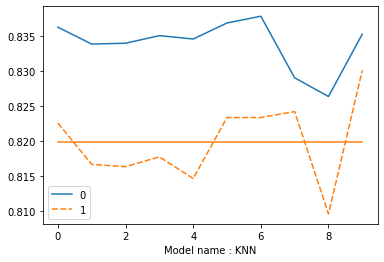

classification report               precision    recall  f1-score   support

           0       0.85      0.89      0.87     22275
           1       0.80      0.74      0.77     13227

    accuracy                           0.83     35502
   macro avg       0.83      0.82      0.82     35502
weighted avg       0.83      0.83      0.83     35502



Model name : random forest


[[20618  1657]
 [ 3163 10064]]




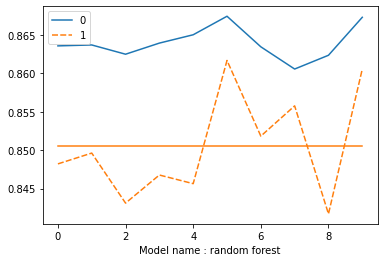

classification report               precision    recall  f1-score   support

           0       0.87      0.93      0.90     22275
           1       0.86      0.76      0.81     13227

    accuracy                           0.86     35502
   macro avg       0.86      0.84      0.85     35502
weighted avg       0.86      0.86      0.86     35502



Model name : decision tree


[[18869  3406]
 [ 3051 10176]]




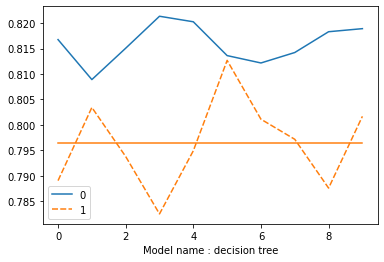

classification report               precision    recall  f1-score   support

           0       0.86      0.85      0.85     22275
           1       0.75      0.77      0.76     13227

    accuracy                           0.82     35502
   macro avg       0.81      0.81      0.81     35502
weighted avg       0.82      0.82      0.82     35502





In [74]:
from sklearn.decomposition import PCA
pca = PCA(.95)
x_train_pca = pca.fit_transform(x_train, y_train)
x_test_pca = pca.transform(x_test)
models = []
train_scores_k_fold_pca = []
test_scores_k_fold_pca = []
models.append(('Model name : LogisticRegression',LogisticRegression()))
models.append(('Model name : KNN', KNeighborsClassifier()))
models.append(('Model name : random forest', RandomForestClassifier()))
models.append(('Model name : decision tree', DecisionTreeClassifier()))
for name,model in models:
    print(name)
    print('\n')
    model.fit(x_train_pca, y_train)
    predictions = model.predict(x_test_pca)
    print(confusion_matrix(y_test, predictions))
    print('\n')
    from sklearn.model_selection import cross_val_score 
    train_scores_k_fold_pca = cross_val_score(estimator = model, X = x_train_pca, y = y_train, cv = 10)
    test_scores_k_fold_pca = cross_val_score(estimator = model, X = x_test_pca, y = y_test, cv = 10) 
    sns.lineplot(data = [train_scores_k_fold_pca,test_scores_k_fold_pca])
    plt.plot([np.mean(test_scores_k_fold_pca)]*len(test_scores_k_fold_pca))
    plt.xlabel(name)
    plt.show()
    from sklearn.metrics import classification_report
    print('classification report {}'.format(classification_report(y_test,predictions)))
    print('\n')

# logistic regression hyperparameter

{'class_weight': {0: 0.452713567839196, 1: 0.547286432160804}}


Text(0.5, 1.0, 'Scoring for different class weights')

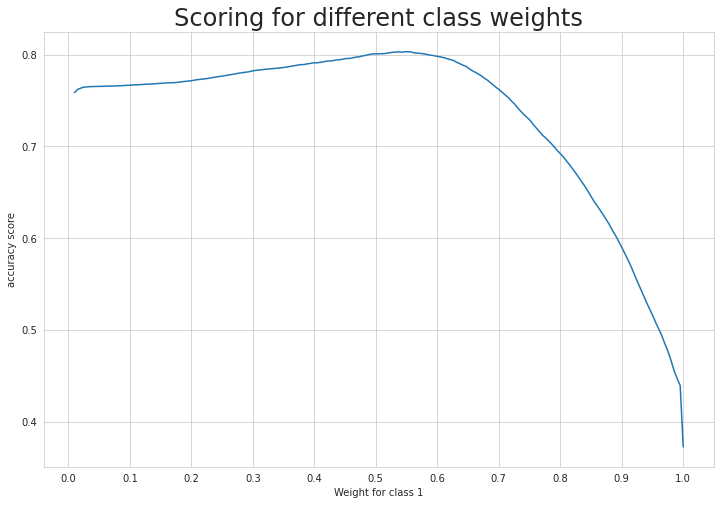

In [75]:
#using grid search for best class weights using accuracy score metrics in logistic regression 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)
param= {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
gridsearch = GridSearchCV(estimator=lr, 
                          param_grid = param, 
                          scoring= 'accuracy').fit(x_train, y_train)
print(gridsearch.best_params_)
import seaborn as sns 
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('accuracy score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

# random forest hyperparameter


In [76]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = -1)
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 54.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

# decision tree hyperparameter

In [77]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)}

DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 10, verbose = True)
DT_grid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

# knn hyperparameter

maximum accuracy:- 0.8373894428482902 at K = 3


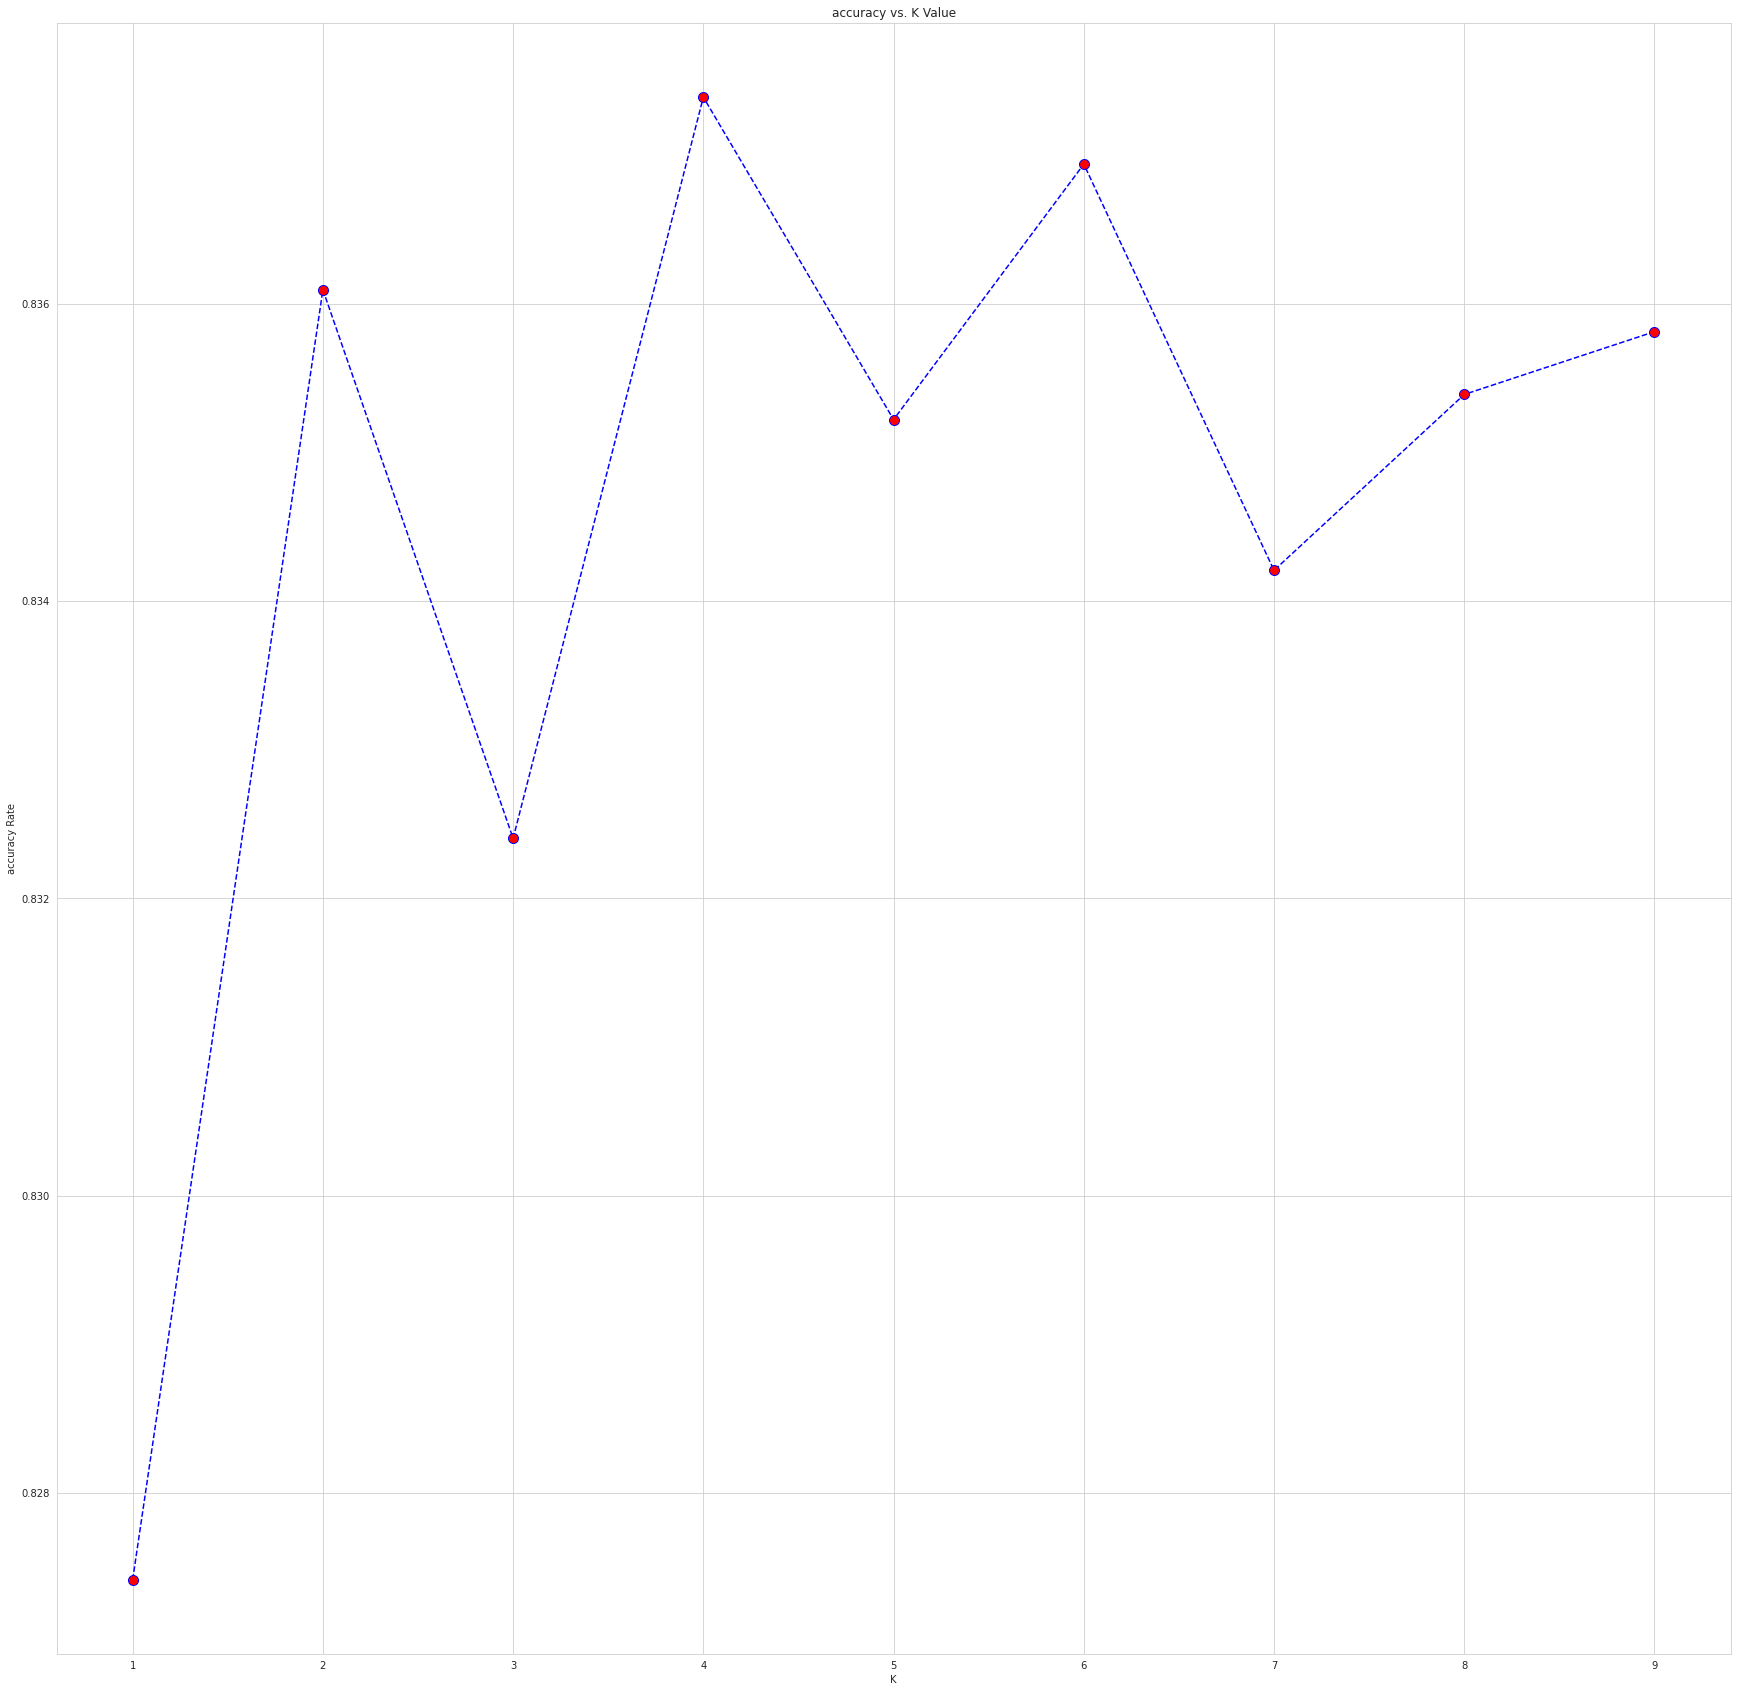

In [78]:
accuracy_scores = []
for i in range(1,10):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_train,y_train)
     pred_i = knn.predict(x_test)
     accuracy_scores.append(accuracy_score(pred_i,y_test))
plt.figure(figsize=(30,30))
plt.plot(range(1,10),accuracy_scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')
print("maximum accuracy:-",max(accuracy_scores),"at K =",accuracy_scores.index(max(accuracy_scores)))

In [79]:
DT_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_split': 4}

In [80]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 72}

Model name : LogisticRegression


[[19896  2379]
 [ 4578  8649]]




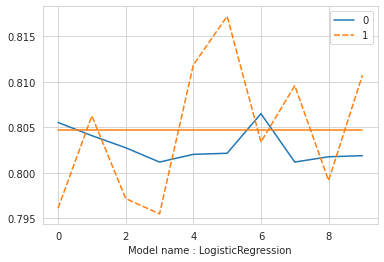

classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85     22275
           1       0.78      0.65      0.71     13227

    accuracy                           0.80     35502
   macro avg       0.80      0.77      0.78     35502
weighted avg       0.80      0.80      0.80     35502



Model name : KNN


[[19766  2509]
 [ 3341  9886]]




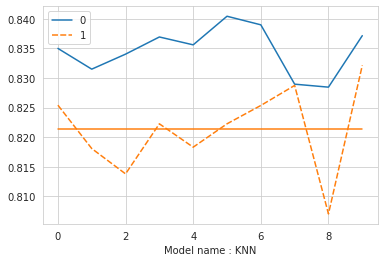

classification report               precision    recall  f1-score   support

           0       0.86      0.89      0.87     22275
           1       0.80      0.75      0.77     13227

    accuracy                           0.84     35502
   macro avg       0.83      0.82      0.82     35502
weighted avg       0.83      0.84      0.83     35502



Model name : random forest


[[21885   390]
 [ 7132  6095]]




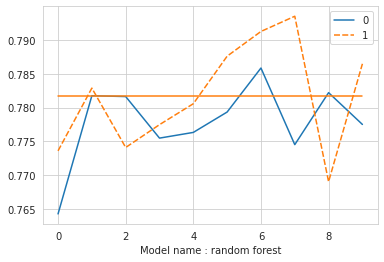

classification report               precision    recall  f1-score   support

           0       0.75      0.98      0.85     22275
           1       0.94      0.46      0.62     13227

    accuracy                           0.79     35502
   macro avg       0.85      0.72      0.74     35502
weighted avg       0.82      0.79      0.77     35502



Model name : decision tree


[[19900  2375]
 [ 3263  9964]]




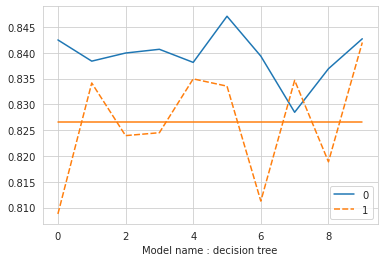

classification report               precision    recall  f1-score   support

           0       0.86      0.89      0.88     22275
           1       0.81      0.75      0.78     13227

    accuracy                           0.84     35502
   macro avg       0.83      0.82      0.83     35502
weighted avg       0.84      0.84      0.84     35502





In [81]:
models = []
train_scores_k_fold = []
test_scores_k_fold = []
models.append(('Model name : LogisticRegression',LogisticRegression(class_weight = {0: 0.4576884422110553, 1: 0.5423115577889447})))
models.append(('Model name : KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('Model name : random forest', RandomForestClassifier(bootstrap = False,max_depth= 4,max_features= 'auto',min_samples_leaf = 2,min_samples_split = 2, n_estimators = 33)))
models.append(('Model name : decision tree', DecisionTreeClassifier(min_samples_split = 4,max_features = 'log2',max_depth = 20,criterion = 'entropy')))
for name,model in models:
    print(name)
    print('\n')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(confusion_matrix(y_test, predictions))
    print('\n')
    from sklearn.model_selection import KFold 
    kf = KFold(n_splits=10) 
    test_scores_k_fold = []
    train_scores_k_fold = []
    from sklearn.model_selection import cross_val_score 
    train_scores_k_fold = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    test_scores_k_fold = cross_val_score(estimator = model, X = x_test, y = y_test, cv = 10) 
    sns.lineplot(data = [train_scores_k_fold,test_scores_k_fold])
    plt.plot([np.mean(test_scores_k_fold)]*len(test_scores_k_fold))
    plt.xlabel(name)
    plt.show()
    from sklearn.metrics import classification_report
    print('classification report {}'.format(classification_report(y_test,predictions)))
    print('\n')